In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import ElementsEnv
from scipy import signal
from astropy.table import Table

%erun Elements 6.0.1

os.environ['ELEMENTS_AUX_PATH'] = '/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/auxdir/'

sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/python/')

%load_ext autoreload
%autoreload 2

from nnpz.photometry.filter_provider import DirectoryFilterProvider
from nnpz.photometry.calculator.photometry_calculator import PhotometryCalculator
from nnpz.photometry.calculator.fnu_ujy_processor import FnuuJyPrePostProcessor
from nnpz.reference_sample.ReferenceSample import ReferenceSample

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

plt.rcParams['figure.figsize'] = (15, 20)

In [25]:
nnpz_photo = Table.read('/tmp/nnpz_corr.fits', hdu=1)
phos_photo = Table.read('/tmp/phosphoros_corr.fits', hdu=1)

In [26]:
set(nnpz_photo.colnames).difference(set(phos_photo.colnames))

set()

In [27]:
assert(np.array_equal(nnpz_photo['ID'], phos_photo['ID']))

In [28]:
bands = [c for c in nnpz_photo.colnames if '_' not in c and c != 'ID']

# Take a subset

In [29]:
#ids = np.random.choice(len(nnpz_photo), 5000)
#nnpz_photo = nnpz_photo[ids]
#phos_photo = phos_photo[ids]

# Photometry

/opt/miniconda3/envs/phz/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


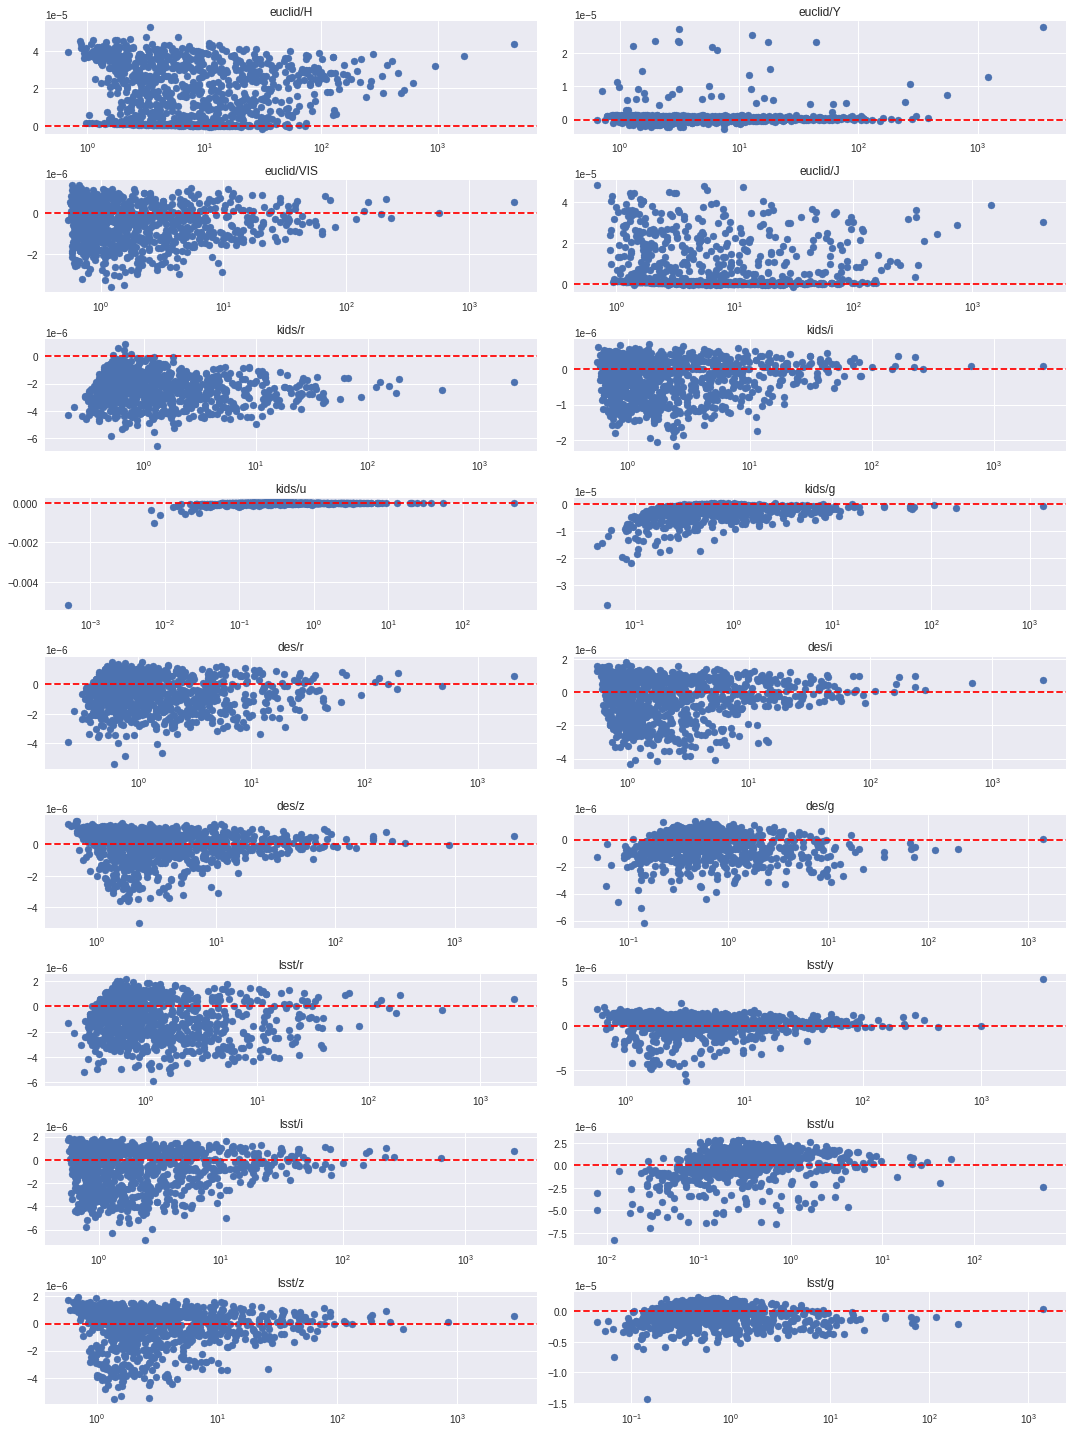

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=len(bands)//2)

for i, ax in enumerate(axes.ravel()):
    ax.set_title(bands[i])
    ax.scatter(nnpz_photo[bands[i]], (phos_photo[bands[i]]-nnpz_photo[bands[i]]) / nnpz_photo[bands[i]])
    ax.axhline(0, linestyle='--', color='red')
    ax.set_xscale('log')
    
plt.tight_layout()
plt.show()

# GAL EBV

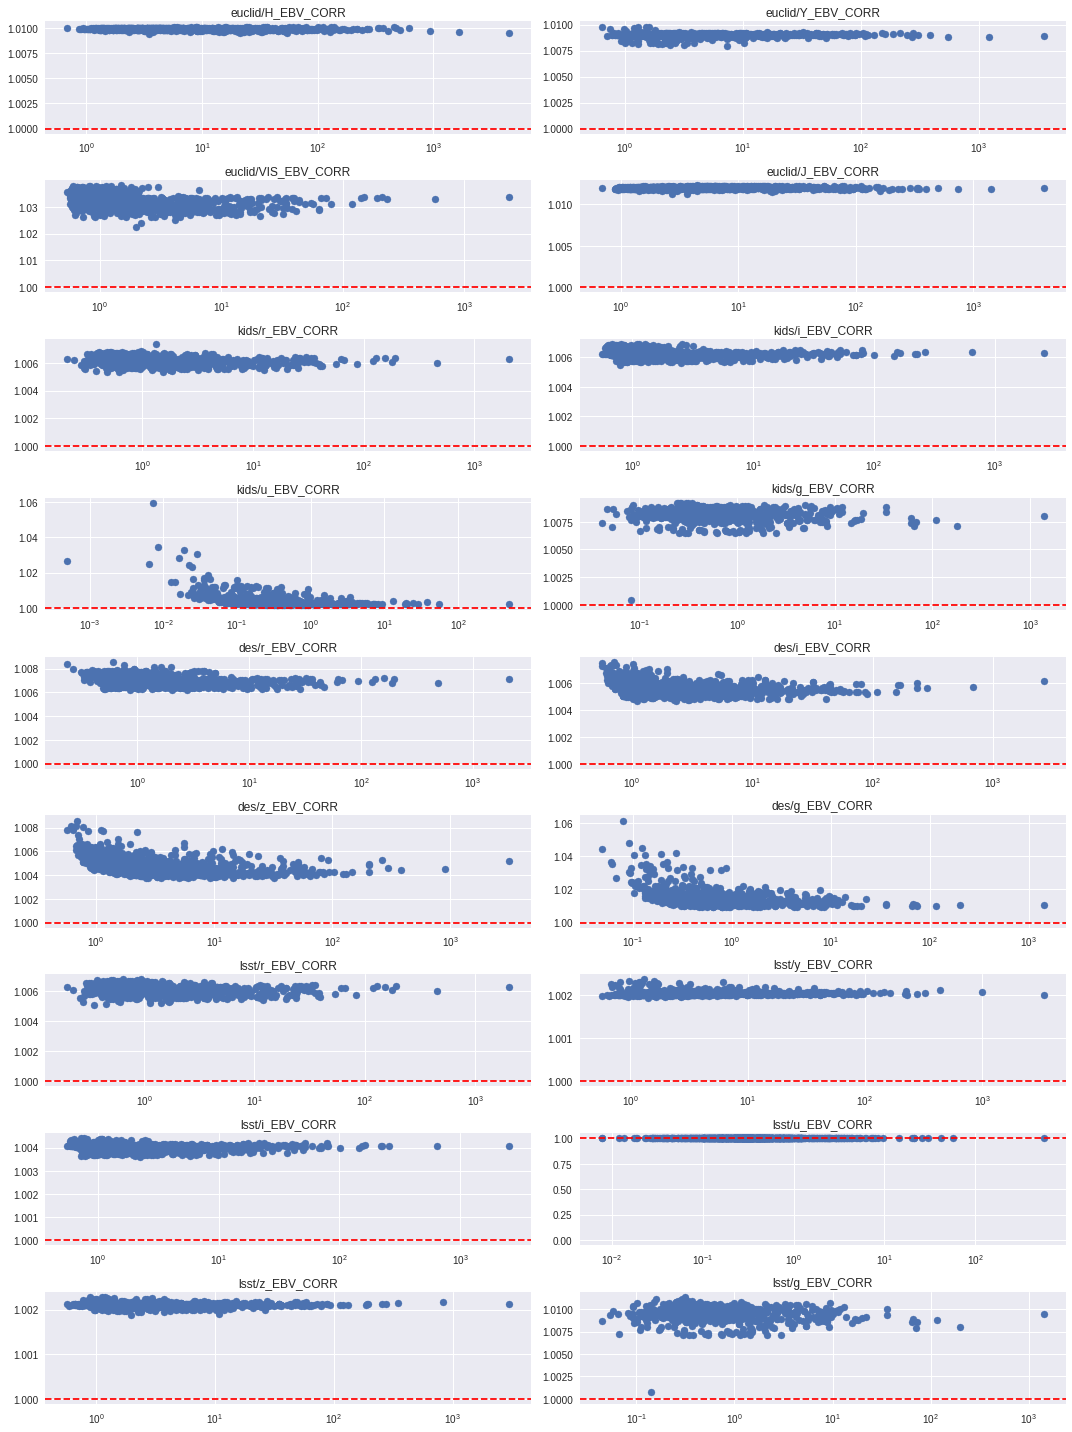

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=len(bands)//2)

for i, ax in enumerate(axes.ravel()):
    cname = bands[i] + '_EBV_CORR'
    ax.set_title(cname)
    ax.scatter(nnpz_photo[bands[i]], phos_photo[cname]/nnpz_photo[cname].reshape(-1))
    ax.axhline(1, linestyle='--', color='red')
    ax.set_xscale('log')
    
plt.tight_layout()
plt.show()

This is understood: using the union of the knots from the MW and the SED result on a increase of ~1.0005 of the integral of the
resulting curve wrt. interpolating the MW over the SED knots.

# Filter variation correction

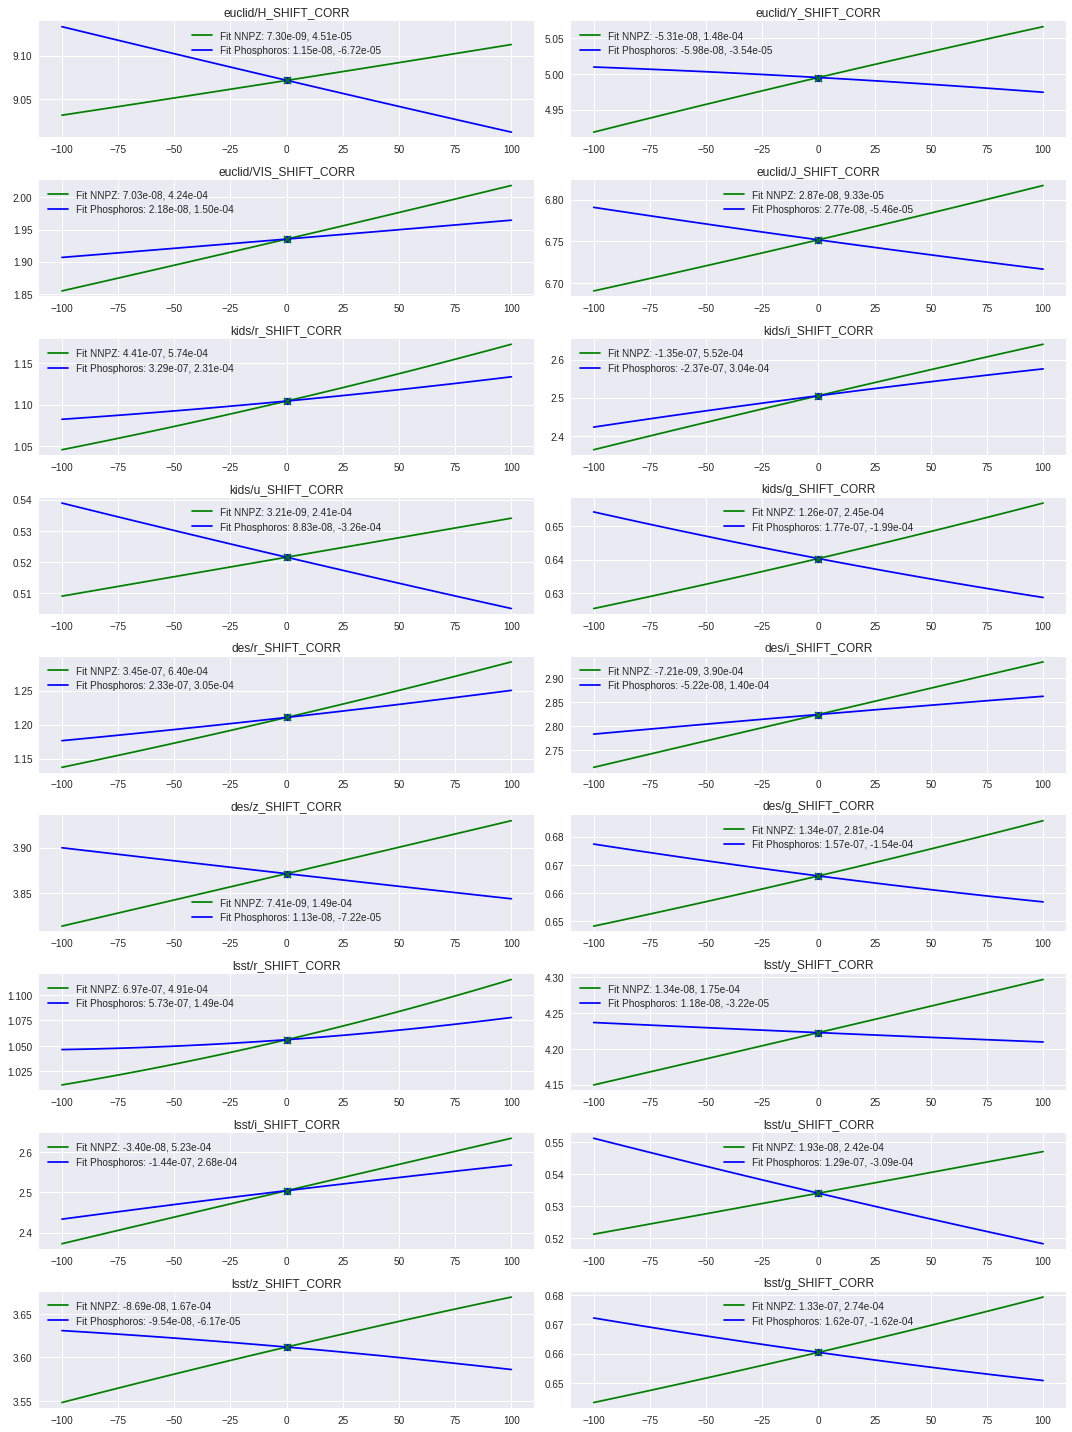

In [33]:
shifts = np.linspace(-100, 100, 100)

fig, axes = plt.subplots(ncols=2, nrows=len(bands)//2)

idx = np.random.choice(len(nnpz_photo))

for i, ax in enumerate(axes.ravel()):
    cname = bands[i] + '_SHIFT_CORR'
    ax.set_title(cname)
    
    a, b = nnpz_photo[cname][idx]
    phot = nnpz_photo[bands[i]][idx]
    ax.plot(shifts, phot * (a * shifts**2 + b * shifts + 1), color='green', label=f'Fit NNPZ: {a:.2e}, {b:.2e}')
    ax.scatter([0], phot, marker='o', color='blue', zorder=4)
    
    a, b = phos_photo[cname][idx]
    phot = phos_photo[bands[i]][idx]
    ax.plot(shifts, phot * (a * shifts**2 + b * shifts + 1), color='blue', label=f'Fit Phosphoros: {a:.2e}, {b:.2e}')
    ax.scatter([0], phot, marker='x', color='green', zorder=5)
    
    ax.legend()
    
plt.tight_layout()
plt.show()